# 24.08.02 머신러닝 학습 18회차: 이상치 탐지

## 01 개념

### 🔎Outlier(이상치) 개념

1. 전체 데이터의 패턴에서 벗어난 이상 값을 가진 데이터

2. 다른 데이터와 현저히 다른 값으로, 데이터 집합 내에서 일반적인 패턴이나 트렌드를 따르지 않는 데이터 포인트

2. 머신러닝 모델의 성능 개선을 위해 찾아내는 과정이 필요하다.

### 🔎생성 원인

데이터 수집 오류, 자연적인 변동성, 드문 사건 또는 극단적인 값이 원인이 될 수 있다.

### 🔎이상치가 중요한 이유

1. 모델 성능 저하
    - 이상치는 머신러닝 모델의 학습 과정에 부정적인 영향을 미칠 수 있다.
    
    - 특히, 선형 모델과 같은 민감한 모델에서는 이상치가 전체 모델의 성능을 크게 저하시킬 수 있다.

2. 분석 결과 왜곡

    - 이상치는 데이터의 통계적 특성을 왜곡시켜 잘못된 결론을 도출하게 만들 수 있다.

### 🔎이상치 탐지 방법

1. 시각화 방법

    - 박스플롯(Box Plot): 데이터의 분포와 이상치를 시각적으로 표현하는 방법

    - 산점도(Scatter Plot): 두 변수 간의 관계를 시각화하여 이상치를 확인한다.
    
2. 통계적 방법

    - Z-점수(Z-score): 데이터 포인트가 **평균**에서 얼마나 떨어져 있는지를 표준 편차 단위로 측정한다.

    - IQR(Interquartile Range): 1사분위수(Q1)와 3사분위수(Q3) 사이의 범위를 기준으로 이상치를 식별한다.

    - 이상치 기준: 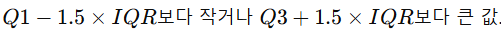

3. 모델 기반 방법

    - Isolation Forest: 이상치를 찾기 위해 데이터를 분할하는 방법다. 이상치는 분할 횟수가 적기 때문에 쉽게 분리된다.

    - Local Outlier Factor(LOF): 각 데이터 포인트의 밀도를 계산하여 해당 포인트가 이상치인지 여부를 결정한다.

### 🔎이상치 처리 방법: 제거, 변환, 대체, 모델링 기법 변경

1. 제거: 단순히 이상치를 제거하여 데이터의 일관성을 유지하는 방법. 하지만 중요한 정보가 손실될 수 있다.

2. 변환: 로그 변환, 루트 변환 등의 방법으로 이상치의 영향을 줄인다.

3. 대체: 이상치를 평균, 중앙값 또는 다른 통계 값으로 대체한다.

4. 모델링 기법 변경: 이상치에 덜 민감한 모델을 사용한다. 예를 들어, 결정 트리 기반 모델은 이상치에 덜 민감하다.

### 💡이상치 탐지 및 처리 시 고려사항

1. 도메인 지식 활용: 데이터의 특성과 이상치의 원인을 이해하는 것이 중요하다.

2. 다양한 방법 사용: 여러 방법을 사용하여 이상치를 탐지하고 처리하는 것이 좋다.

3. 모델링 목표 고려: 이상치 처리는 모델링 목표와 데이터 특성에 따라 달라질 수 있다.

### 🔎IQR(Inter Quantile Range) 방식의 제거

1. IQR은 사분위(Quantile) 값의 편차를 이용하는 방법이다.

2. 흑히 박스 플롯 방식으로 시각화할 수 있다.

### 🔎사분위와 IQR

1. 전체 데이터의를 높은 순으로 정렬하고, 이를 25% 구간씩 Q1~Q4까지 분할하는 방식을 사분위라고 지칭한다.

2. 이들 중에 25% 구간인 Q1에서 75% 구간인 Q3의 범위를 IQR이라고 한다.

3. 보통 IQR에 1.5를 곱해서 최댓값과 최솟값을 생성시키고, 이를 초과하거나 미달하는 데이터를 이상치로 간주한다.

4. 높은 순으로 정렬하니 Q3에서 1.5*IQR 지점이 최댓값이고, Q1에서 1.5*IQR 지점이 최댓값이 된다.

4. IQR 방식을 시각화한 도표가 박스 플롯이다.

### 🔎Outlier 제거 순서

1. 어떤 피처의 이상치 데이터를 검출할 것인지 선택 과정이 필요하다.

2. 먼저 y값(결정값)과 상관성이 높은 피처들 위주로 이상치를 검출하는 것이 좋다.

3. 모든 피처를 체크하는 것은 시간이 많이 소요되며, 상관성이 높지 않으면 높은 성능 향상을 기대하기 어렵다.

### 💡결론

1. 이상치 탐지와 처리는 데이터 분석 및 머신러닝에서 중요한 단계이다.

2. 이상치를 탐지하고 적절히 처리하면 모델의 성능을 향상시키고 데이터 분석의 신뢰성을 높일 수 있다.

3. 다양한 방법을 시도하고 도메인 지식을 활용하는 것이 성공적인 이상치 처리를 위한 핵심이다.

## 02 코드 실습(1)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('./dataset/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### cmap='RdBu'

양의 상관관계가 높은 수록 진한 파랑색, 음의 상관관계가 높을 수록 진한 빨간색으로 표현된다.

<Axes: >

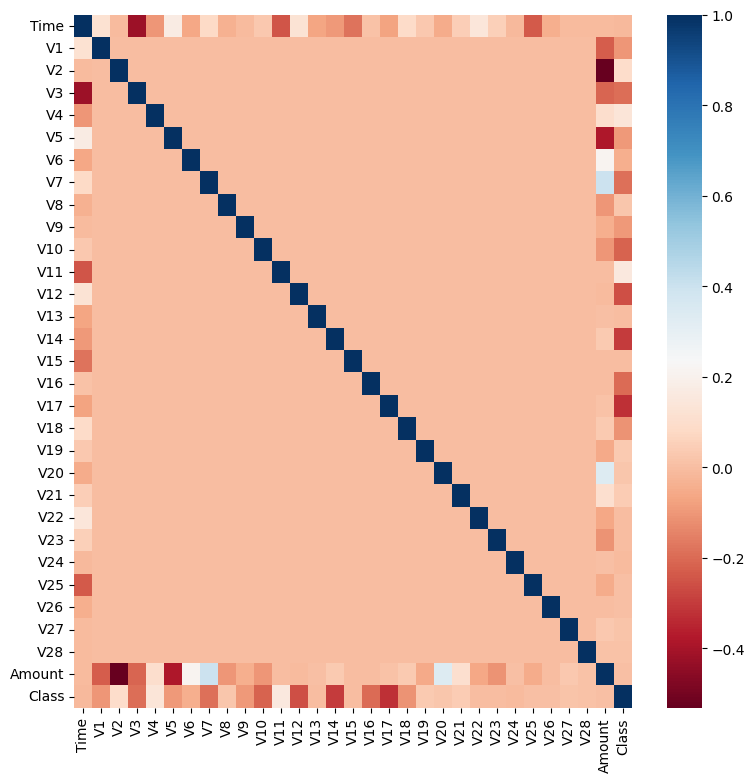

In [6]:
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

### 실행 결과

결정값(y값)과 음의 상관관계가 높은 V14, V17 중에 V14의 이상치를 제거해보도록 한다.

In [8]:
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출한다.
    fraud = df[df['Class']==1][column]
    # Q1, Q3 지점을 구한다.
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, 1.5를 곱한 다음 최대, 최소 지점을 구한다.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 이상치를 DataFrame index로 반환한다.
    outlier_index = fraud[(fraud<lowest_val) | (fraud>highest_val)].index
    return outlier_index

In [9]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스: ', outlier_index)

이상치 데이터 인덱스:  Index([8296, 8615, 9035, 9252], dtype='int64')


## 03 코드 실습(2)

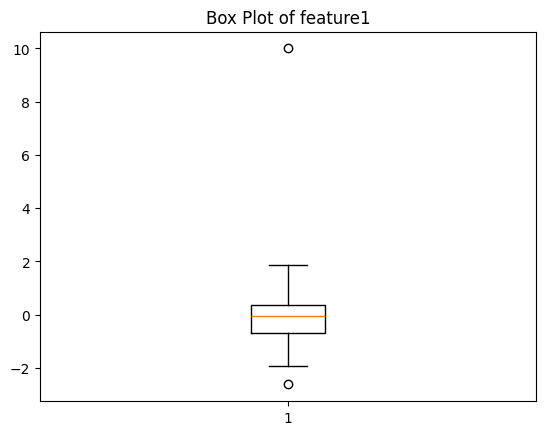

In [11]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# 샘플 데이터 생성
np.random.seed(42)
data = np.random.randn(100, 2)

# 이상치 추가
data = np.concatenate([data, [[10, 10]]])

# 데이터프레임으로 변환
df = pd.DataFrame(data, columns=['feature1', 'feature2'])

# 이상치 시각화 (박스 플롯)
plt.boxplot(df['feature1'])
plt.title('Box Plot of feature1')
plt.show()

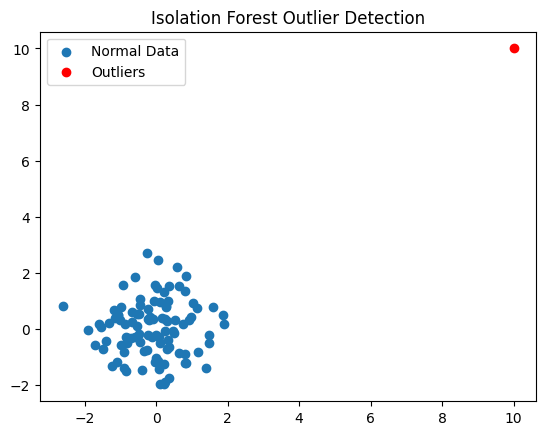

In [12]:
# Isolation Forest를 이용한 이상치 탐지
iso_forest = IsolationForest(contamination=0.01)
df['anomaly'] = iso_forest.fit_predict(df[['feature1', 'feature2']])

# 이상치 표시
outliers = df[df['anomaly'] == -1]
normal_data = df[df['anomaly'] == 1]

plt.scatter(normal_data['feature1'], normal_data['feature2'], label='Normal Data')
plt.scatter(outliers['feature1'], outliers['feature2'], color='red', label='Outliers')
plt.legend()
plt.title('Isolation Forest Outlier Detection')
plt.show()